In [1]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

Cloning into 'ML-Bootcamp'...
remote: Enumerating objects: 598, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 598 (delta 76), reused 45 (delta 34), pack-reused 454
Receiving objects: 100% (598/598), 13.97 MiB | 17.99 MiB/s, done.
Resolving deltas: 100% (195/195), done.


In [2]:
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
data = pd.read_csv("/content/ML-Bootcamp/Week-3/Day-1/Dataset/SMSSpamCollection.txt", sep="\t", names = ['label','text'])
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
data.shape

(5572, 2)

In [9]:
sn = SnowballStemmer("english")
stop = set(stopwords.words("english"))

In [10]:
def clean_text(sms):
    sms = sms.lower()
    sms = re.sub("[^a-z]", ' ', sms)
    sms = nltk.word_tokenize(sms)
    sms = [t for t in sms if len(t)>1]
    sms = [sn.stem(word) for word in sms if word not in stop]
    sms = ' '.join(sms)
    return sms


In [11]:
clean_text("This is a Sample Test to CHECK and remove ? @ #* $ 123 i playing")


'sampl test check remov play'

In [12]:
data['clean_text'] = data['text'].apply(clean_text)


In [13]:
data.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [14]:
ham_data = data[data['label'] == 'ham']
ham_data = ham_data['clean_text']


In [15]:
def wordcloud(data):
    words = ' '.join(data)
    wc = WordCloud(background_color='white')
    wc = wc.generate(words)

    plt.figure(figsize = (10, 8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

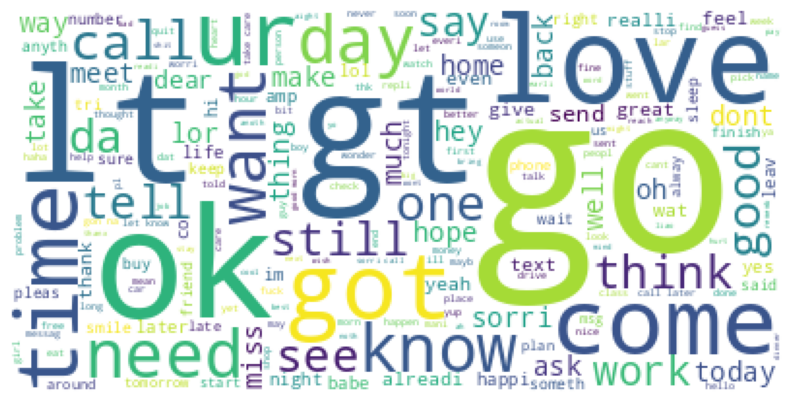

In [16]:
wordcloud(ham_data)

In [17]:
spam_data = data[data['label'] == 'spam']
spam_data = spam_data['clean_text']

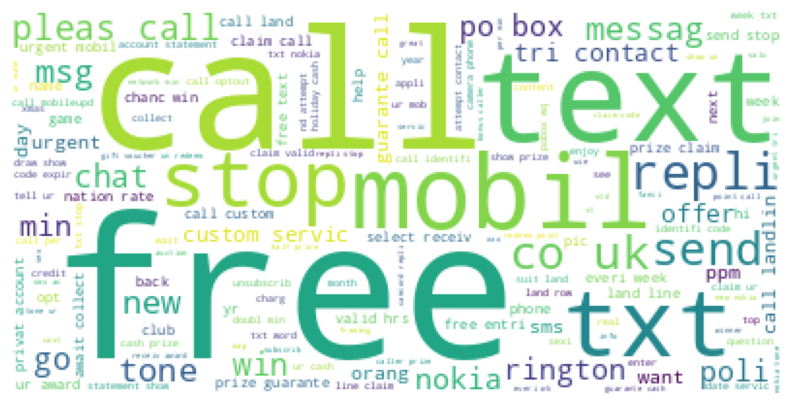

In [18]:
wordcloud(spam_data)

In [19]:
cv = CountVectorizer(max_features= 5000)
cv


CountVectorizer(max_features=5000)

In [20]:
x = cv.fit_transform(data['clean_text']).toarray()
x


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:

x.shape

(5572, 5000)

In [22]:
y = pd.get_dummies(data['label'])
y


,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [23]:
y = y['spam'].values
y


array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [25]:
model = MultinomialNB()

In [26]:
model.fit(X_train, Y_train)

MultinomialNB()

In [27]:
Y_pred = model.predict(X_test)

In [28]:
Y_test, Y_pred

(array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8))

In [29]:
pd.DataFrame({'Actual' : Y_test, 'predicted': Y_pred}).head(10)

,Actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [30]:
print("Accuracy on Training Data: ")
print(model.score(X_train, Y_train))

Accuracy on Training Data: 
0.990892043932494


In [31]:

print("Accuracy on Training Data: ")
print(model.score(X_test, Y_test))

Accuracy on Training Data: 
0.9847743338771071
